<a href="https://colab.research.google.com/github/nahidosen/1821168042_CSE445_Spring21/blob/main/Classification_Task/Classification_Task_Audit_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

a) Exploratory Data Analysis (EDA) and all the necessary data preparation

b) Use any of the classification methods to build a predictor for classifying suspicious firms

c) Use proper evaluation parameters that have been discussed in the class to evaluate your result.

d) Submit your code in an ipython notebook format in your Github repository and generate a report describing all of the above mentioned.

In [3]:
# Importing necessary packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
from sklearn.impute import SimpleImputer

In [4]:
# Importing dataset csv files

audit_risk = 'https://raw.githubusercontent.com/nahidosen/1821168042_CSE445_Spring21/main/datasets/audit_risk.csv?token=ASXWIV77VJQESEVYD5NFPLLAUXWZQ'
trial = 'https://raw.githubusercontent.com/nahidosen/1821168042_CSE445_Spring21/main/datasets/trial.csv?token=ASXWIV5QF2KCSGTA27H3JN3AUXW5W'

df_audit_risk = pd.read_csv(audit_risk)
df_trial = pd.read_csv(trial)

In [5]:
df_audit_risk

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2,0.2,0.4,0,0.2,0.0,2.4,8.574,0.4,0.5,1.7148,1
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2,0.2,0.4,0,0.2,0.0,2.0,2.554,0.4,0.5,0.5108,0
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.548,0.4,0.5,0.3096,0
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2,0.2,0.4,0,0.2,0.0,4.4,17.530,0.4,0.5,3.5060,1
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.416,0.4,0.5,0.2832,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.098,0.40,0.2,0.080,0.89,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.578,0.4,0.5,0.3156,0
772,55.57,16,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.568,0.4,0.5,0.3136,0
773,55.57,14,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.456,0.4,0.5,0.2912,0
774,55.57,18,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2,0.2,0.4,0,0.2,0.0,2.0,1.440,0.4,0.5,0.2880,0


In [6]:
df_audit_risk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 27 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sector_score    776 non-null    float64
 1   LOCATION_ID     776 non-null    object 
 2   PARA_A          776 non-null    float64
 3   Score_A         776 non-null    float64
 4   Risk_A          776 non-null    float64
 5   PARA_B          776 non-null    float64
 6   Score_B         776 non-null    float64
 7   Risk_B          776 non-null    float64
 8   TOTAL           776 non-null    float64
 9   numbers         776 non-null    float64
 10  Score_B.1       776 non-null    float64
 11  Risk_C          776 non-null    float64
 12  Money_Value     775 non-null    float64
 13  Score_MV        776 non-null    float64
 14  Risk_D          776 non-null    float64
 15  District_Loss   776 non-null    int64  
 16  PROB            776 non-null    float64
 17  RiSk_E          776 non-null    flo

In [7]:
df_audit_risk[df_audit_risk['Money_Value'].isnull() == True]

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Detection_Risk,Audit_Risk,Risk
642,55.57,4,0.23,0.2,0.046,0.0,0.2,0.0,0.23,5.0,0.2,1.0,NaN,0.2,0.0,2,0.2,0.4,0,0.2,0.0,2.0,1.446,0.4,0.5,0.2892,0


In [8]:
df_audit_risk['Money_Value'] = df_audit_risk['Money_Value'].fillna(df_audit_risk['Money_Value'].median())

In [9]:
df_audit_risk.isnull().sum() 

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [10]:
df_audit_risk.nunique()

Sector_score       13
LOCATION_ID        45
PARA_A            363
Score_A             3
Risk_A            363
PARA_B            358
Score_B             3
Risk_B            360
TOTAL             471
numbers             5
Score_B.1           3
Risk_C              5
Money_Value       328
Score_MV            3
Risk_D            328
District_Loss       3
PROB                3
RiSk_E              5
History             7
Prob                3
Risk_F              7
Score              17
Inherent_Risk     584
CONTROL_RISK       11
Detection_Risk      1
Audit_Risk        601
Risk                2
dtype: int64

In [11]:
df_audit_risk_1 = df_audit_risk.drop(['Detection_Risk'], axis = 1) # Because it has only one value 

In [12]:
df_audit_risk_1.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk'],
      dtype='object')

Checked every unique value to find anomaly

In [13]:
df_audit_risk_1["LOCATION_ID"].value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
21          8
27          8
28          8
43          7
25          6
20          5
38          4
30          4
7           4
36          4
40          3
3           3
35          2
33          1
17          1
23          1
34          1
SAFIDON     1
LOHARU      1
NUH         1
41          1
44          1
24          1
42          1
Name: LOCATION_ID, dtype: int64

In [14]:
df_audit_risk_1 = df_audit_risk_1[(df_audit_risk_1.LOCATION_ID != 'LOHARU')]
df_audit_risk_1 = df_audit_risk_1[(df_audit_risk_1.LOCATION_ID != 'NUH')]
df_audit_risk_1 = df_audit_risk_1[(df_audit_risk_1.LOCATION_ID != 'SAFIDON')]

In [15]:
df_audit_risk_1["LOCATION_ID"].value_counts()

8     76
19    68
9     53
16    52
12    47
5     44
2     41
4     37
13    35
15    35
6     33
32    29
11    26
22    24
29    21
14    20
18    16
31    12
1     11
37    10
39     9
21     8
27     8
28     8
43     7
25     6
20     5
36     4
38     4
7      4
30     4
3      3
40     3
35     2
17     1
24     1
34     1
33     1
44     1
41     1
23     1
42     1
Name: LOCATION_ID, dtype: int64

In [16]:
df_audit_risk_2 = df_audit_risk_1.drop_duplicates(keep = 'first')

In [17]:
df_audit_risk_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    object 
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   Risk_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   Score_B        760 non-null    float64
 7   Risk_B         760 non-null    float64
 8   TOTAL          760 non-null    float64
 9   numbers        760 non-null    float64
 10  Score_B.1      760 non-null    float64
 11  Risk_C         760 non-null    float64
 12  Money_Value    760 non-null    float64
 13  Score_MV       760 non-null    float64
 14  Risk_D         760 non-null    float64
 15  District_Loss  760 non-null    int64  
 16  PROB           760 non-null    float64
 17  RiSk_E         760 non-null    float64
 18  History   

In [18]:
df_audit_risk_3 = df_audit_risk_2.astype(float)

In [19]:
df_audit_risk_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   Risk_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   Score_B        760 non-null    float64
 7   Risk_B         760 non-null    float64
 8   TOTAL          760 non-null    float64
 9   numbers        760 non-null    float64
 10  Score_B.1      760 non-null    float64
 11  Risk_C         760 non-null    float64
 12  Money_Value    760 non-null    float64
 13  Score_MV       760 non-null    float64
 14  Risk_D         760 non-null    float64
 15  District_Loss  760 non-null    float64
 16  PROB           760 non-null    float64
 17  RiSk_E         760 non-null    float64
 18  History   

now the 2nd dataset

In [20]:
df_trial

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,6,2.50,2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,2,4.83,2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,2,0.23,2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,2,10.80,6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,2,0.08,2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,2,0.40,2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,2,0.37,2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,2,0.04,2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,2,0.00,2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [21]:
df_trial['SCORE_A'] = df_trial['SCORE_A']/10
df_trial['SCORE_B'] = df_trial['SCORE_B']/10

In [22]:
df_trial

,Sector_score,LOCATION_ID,PARA_A,SCORE_A,PARA_B,SCORE_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
0,3.89,23,4.18,0.6,2.50,0.2,6.68,5.0,2,3.38,2,2,0,2,0,2,2.4,1
1,3.89,6,0.00,0.2,4.83,0.2,4.83,5.0,2,0.94,2,2,0,2,0,2,2.0,0
2,3.89,6,0.51,0.2,0.23,0.2,0.74,5.0,2,0.00,2,2,0,2,0,2,2.0,0
3,3.89,6,0.00,0.2,10.80,0.6,10.80,6.0,6,11.75,6,2,0,2,0,2,4.4,1
4,3.89,6,0.00,0.2,0.08,0.2,0.08,5.0,2,0.00,2,2,0,2,0,2,2.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771,55.57,9,0.49,0.2,0.40,0.2,0.89,5.0,2,0.00,2,2,0,2,0,2,2.0,0
772,55.57,16,0.47,0.2,0.37,0.2,0.84,5.0,2,0.00,2,2,0,2,0,2,2.0,0
773,55.57,14,0.24,0.2,0.04,0.2,0.28,5.0,2,0.00,2,2,0,2,0,2,2.0,0
774,55.57,18,0.20,0.2,0.00,0.2,0.20,5.0,2,0.00,2,2,0,2,0,2,2.0,0


In [23]:
df_audit_risk.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk'],
      dtype='object')

In [24]:
df_trial.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'SCORE_A', 'PARA_B', 'SCORE_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

In [25]:
# Renameing the columns for the same feature
df_trial.columns = ['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk']

In [26]:
df_trial.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 776 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   776 non-null    float64
 1   LOCATION_ID    776 non-null    object 
 2   PARA_A         776 non-null    float64
 3   Score_A        776 non-null    float64
 4   PARA_B         776 non-null    float64
 5   Score_B        776 non-null    float64
 6   TOTAL          776 non-null    float64
 7   numbers        776 non-null    float64
 8   Marks          776 non-null    int64  
 9   Money_Value    775 non-null    float64
 10  MONEY_Marks    776 non-null    int64  
 11  District       776 non-null    int64  
 12  Loss           776 non-null    int64  
 13  LOSS_SCORE     776 non-null    int64  
 14  History        776 non-null    int64  
 15  History_score  776 non-null    int64  
 16  Score          776 non-null    float64
 17  Risk           776 non-null    int64  
dtypes: float64

In [27]:
df_trial[df_trial['Money_Value'].isnull() == True]

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score,Risk
642,55.57,4,0.23,0.2,0.0,0.2,0.23,5.0,2,NaN,2,2,0,2,0,2,2.0,0


In [28]:
df_trial['Money_Value'] = df_trial['Money_Value'].fillna(df_trial['Money_Value'].median())

In [29]:
df_audit_risk.isnull().sum() 

Sector_score      0
LOCATION_ID       0
PARA_A            0
Score_A           0
Risk_A            0
PARA_B            0
Score_B           0
Risk_B            0
TOTAL             0
numbers           0
Score_B.1         0
Risk_C            0
Money_Value       0
Score_MV          0
Risk_D            0
District_Loss     0
PROB              0
RiSk_E            0
History           0
Prob              0
Risk_F            0
Score             0
Inherent_Risk     0
CONTROL_RISK      0
Detection_Risk    0
Audit_Risk        0
Risk              0
dtype: int64

In [30]:
df_trial.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

Checked every unique value to find anomaly

In [31]:
df_trial["LOCATION_ID"].value_counts()

8          76
19         68
9          53
16         52
12         47
5          44
2          41
4          37
15         35
13         35
6          33
32         29
11         26
22         24
29         21
14         20
18         16
31         12
1          11
37         10
39          9
21          8
27          8
28          8
43          7
25          6
20          5
38          4
30          4
7           4
36          4
40          3
3           3
35          2
33          1
17          1
23          1
34          1
SAFIDON     1
LOHARU      1
NUH         1
41          1
44          1
24          1
42          1
Name: LOCATION_ID, dtype: int64

In [32]:
df_trial_1 = df_trial[(df_trial.LOCATION_ID != 'LOHARU')]
df_trial_1 = df_trial_1[(df_trial_1.LOCATION_ID != 'NUH')]
df_trial_1 = df_trial_1[(df_trial_1.LOCATION_ID != 'SAFIDON')]

In [33]:
df_trial_1["LOCATION_ID"].value_counts()

8     76
19    68
9     53
16    52
12    47
5     44
2     41
4     37
13    35
15    35
6     33
32    29
11    26
22    24
29    21
14    20
18    16
31    12
1     11
37    10
39     9
21     8
27     8
28     8
43     7
25     6
20     5
36     4
38     4
7      4
30     4
3      3
40     3
35     2
17     1
24     1
34     1
33     1
44     1
41     1
23     1
42     1
Name: LOCATION_ID, dtype: int64

In [34]:
df_trial_2 = df_trial_1.drop_duplicates(keep = 'first')

In [35]:
df_trial_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    object 
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   PARA_B         760 non-null    float64
 5   Score_B        760 non-null    float64
 6   TOTAL          760 non-null    float64
 7   numbers        760 non-null    float64
 8   Marks          760 non-null    int64  
 9   Money_Value    760 non-null    float64
 10  MONEY_Marks    760 non-null    int64  
 11  District       760 non-null    int64  
 12  Loss           760 non-null    int64  
 13  LOSS_SCORE     760 non-null    int64  
 14  History        760 non-null    int64  
 15  History_score  760 non-null    int64  
 16  Score          760 non-null    float64
 17  Risk           760 non-null    int64  
dtypes: float64

In [36]:
df_trial_3 = df_trial_2.astype(float)

In [37]:
df_trial_3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 775
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   PARA_B         760 non-null    float64
 5   Score_B        760 non-null    float64
 6   TOTAL          760 non-null    float64
 7   numbers        760 non-null    float64
 8   Marks          760 non-null    float64
 9   Money_Value    760 non-null    float64
 10  MONEY_Marks    760 non-null    float64
 11  District       760 non-null    float64
 12  Loss           760 non-null    float64
 13  LOSS_SCORE     760 non-null    float64
 14  History        760 non-null    float64
 15  History_score  760 non-null    float64
 16  Score          760 non-null    float64
 17  Risk           760 non-null    float64
dtypes: float64

In [38]:
df_audit_risk_3.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Audit_Risk', 'Risk'],
      dtype='object')

In [39]:
df_trial_3.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'PARA_B', 'Score_B',
       'TOTAL', 'numbers', 'Marks', 'Money_Value', 'MONEY_Marks', 'District',
       'Loss', 'LOSS_SCORE', 'History', 'History_score', 'Score', 'Risk'],
      dtype='object')

In [40]:
common_columns = np.intersect1d(df_audit_risk_3.columns, df_trial_3.columns)
common_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Risk', 'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL',
       'numbers'], dtype=object)

In [41]:
df_audit_risk_3['History'].equals(df_trial_3['History'])

True

In [42]:
df_audit_risk_3['LOCATION_ID'].equals(df_trial_3['LOCATION_ID'])

True

In [43]:
df_audit_risk_3['Money_Value'].equals(df_trial_3['Money_Value'])

True

In [44]:
df_audit_risk_3['PARA_A'].equals(df_trial_3['PARA_A'])

True

In [45]:
df_audit_risk_3['PARA_B'].equals(df_trial_3['PARA_B'])

True

In [46]:
df_audit_risk_3['Risk'].equals(df_trial_3['Risk'])

False

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


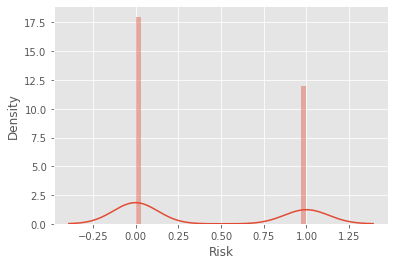

In [64]:
sns.distplot(df_audit_risk_3['Risk'],bins=30)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


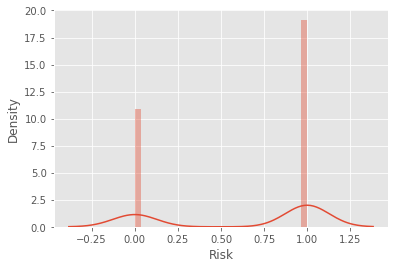

In [65]:
sns.distplot(df_trial_3['Risk'],bins=30)
plt.show()

In [49]:
df_audit_risk_3['Score'].equals(df_trial_3['Score'])

True

In [50]:
df_audit_risk_3['Score_A'].equals(df_trial_3['Score_A'])

True

In [51]:
df_audit_risk_3['Score_B'].equals(df_trial_3['Score_B'])

True

In [52]:
df_audit_risk_3['Sector_score'].equals(df_trial_3['Sector_score'])

True

In [53]:
df_audit_risk_3['TOTAL'].equals(df_trial_3['TOTAL'])

True

In [54]:
df_audit_risk_3['numbers'].equals(df_trial_3['numbers'])

True

So they are equals but the Risk column in trial dataset has different data which is conflicting to the audit dataset. so two datasets can be merged after droping Risk from trial dataset

In [55]:
df_trial_4 = df_trial_3.drop(['Risk'], axis = 1)

In [56]:
df_trial_4

,Sector_score,LOCATION_ID,PARA_A,Score_A,PARA_B,Score_B,TOTAL,numbers,Marks,Money_Value,MONEY_Marks,District,Loss,LOSS_SCORE,History,History_score,Score
0,3.89,23.0,4.18,0.6,2.50,0.2,6.68,5.0,2.0,3.38,2.0,2.0,0.0,2.0,0.0,2.0,2.4
1,3.89,6.0,0.00,0.2,4.83,0.2,4.83,5.0,2.0,0.94,2.0,2.0,0.0,2.0,0.0,2.0,2.0
2,3.89,6.0,0.51,0.2,0.23,0.2,0.74,5.0,2.0,0.00,2.0,2.0,0.0,2.0,0.0,2.0,2.0
3,3.89,6.0,0.00,0.2,10.80,0.6,10.80,6.0,6.0,11.75,6.0,2.0,0.0,2.0,0.0,2.0,4.4
4,3.89,6.0,0.00,0.2,0.08,0.2,0.08,5.0,2.0,0.00,2.0,2.0,0.0,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
770,55.57,18.0,0.75,0.2,0.45,0.2,1.20,5.0,2.0,0.00,2.0,2.0,0.0,2.0,0.0,2.0,2.0
772,55.57,16.0,0.47,0.2,0.37,0.2,0.84,5.0,2.0,0.00,2.0,2.0,0.0,2.0,0.0,2.0,2.0
773,55.57,14.0,0.24,0.2,0.04,0.2,0.28,5.0,2.0,0.00,2.0,2.0,0.0,2.0,0.0,2.0,2.0
774,55.57,18.0,0.20,0.2,0.00,0.2,0.20,5.0,2.0,0.00,2.0,2.0,0.0,2.0,0.0,2.0,2.0


In [57]:
common_columns = np.intersect1d(df_audit_risk_3.columns, df_trial_4.columns)
common_columns

array(['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'],
      dtype=object)

In [58]:
one_df = pd.merge(df_audit_risk_3, df_trial_4, how='outer', on = ['History', 'LOCATION_ID', 'Money_Value', 'PARA_A', 'PARA_B',
       'Score', 'Score_A', 'Score_B', 'Sector_score', 'TOTAL', 'numbers'])

In [59]:
one_df

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23.0,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,0.2,1.0,3.38,0.2,0.676,2.0,0.2,0.4,0.0,0.2,0.0,2.4,8.574,0.4,1.7148,1.0,2.0,2.0,2.0,0.0,2.0,2.0
1,3.89,6.0,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,0.2,1.0,0.94,0.2,0.188,2.0,0.2,0.4,0.0,0.2,0.0,2.0,2.554,0.4,0.5108,0.0,2.0,2.0,2.0,0.0,2.0,2.0
2,3.89,6.0,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.548,0.4,0.3096,0.0,2.0,2.0,2.0,0.0,2.0,2.0
3,3.89,6.0,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,0.6,3.6,11.75,0.6,7.050,2.0,0.2,0.4,0.0,0.2,0.0,4.4,17.530,0.4,3.5060,1.0,6.0,6.0,2.0,0.0,2.0,2.0
4,3.89,6.0,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.416,0.4,0.2832,0.0,2.0,2.0,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,55.57,18.0,0.75,0.2,0.150,0.45,0.2,0.090,1.20,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.640,0.4,0.3280,0.0,2.0,2.0,2.0,0.0,2.0,2.0
756,55.57,16.0,0.47,0.2,0.094,0.37,0.2,0.074,0.84,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.568,0.4,0.3136,0.0,2.0,2.0,2.0,0.0,2.0,2.0
757,55.57,14.0,0.24,0.2,0.048,0.04,0.2,0.008,0.28,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.456,0.4,0.2912,0.0,2.0,2.0,2.0,0.0,2.0,2.0
758,55.57,18.0,0.20,0.2,0.040,0.00,0.2,0.000,0.20,5.0,0.2,1.0,0.00,0.2,0.000,2.0,0.2,0.4,0.0,0.2,0.0,2.0,1.440,0.4,0.2880,0.0,2.0,2.0,2.0,0.0,2.0,2.0


In [60]:
one_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   Risk_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   Score_B        760 non-null    float64
 7   Risk_B         760 non-null    float64
 8   TOTAL          760 non-null    float64
 9   numbers        760 non-null    float64
 10  Score_B.1      760 non-null    float64
 11  Risk_C         760 non-null    float64
 12  Money_Value    760 non-null    float64
 13  Score_MV       760 non-null    float64
 14  Risk_D         760 non-null    float64
 15  District_Loss  760 non-null    float64
 16  PROB           760 non-null    float64
 17  RiSk_E         760 non-null    float64
 18  History   

In [61]:
one_df = one_df.drop_duplicates(keep = 'first')
one_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760 entries, 0 to 759
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sector_score   760 non-null    float64
 1   LOCATION_ID    760 non-null    float64
 2   PARA_A         760 non-null    float64
 3   Score_A        760 non-null    float64
 4   Risk_A         760 non-null    float64
 5   PARA_B         760 non-null    float64
 6   Score_B        760 non-null    float64
 7   Risk_B         760 non-null    float64
 8   TOTAL          760 non-null    float64
 9   numbers        760 non-null    float64
 10  Score_B.1      760 non-null    float64
 11  Risk_C         760 non-null    float64
 12  Money_Value    760 non-null    float64
 13  Score_MV       760 non-null    float64
 14  Risk_D         760 non-null    float64
 15  District_Loss  760 non-null    float64
 16  PROB           760 non-null    float64
 17  RiSk_E         760 non-null    float64
 18  History   

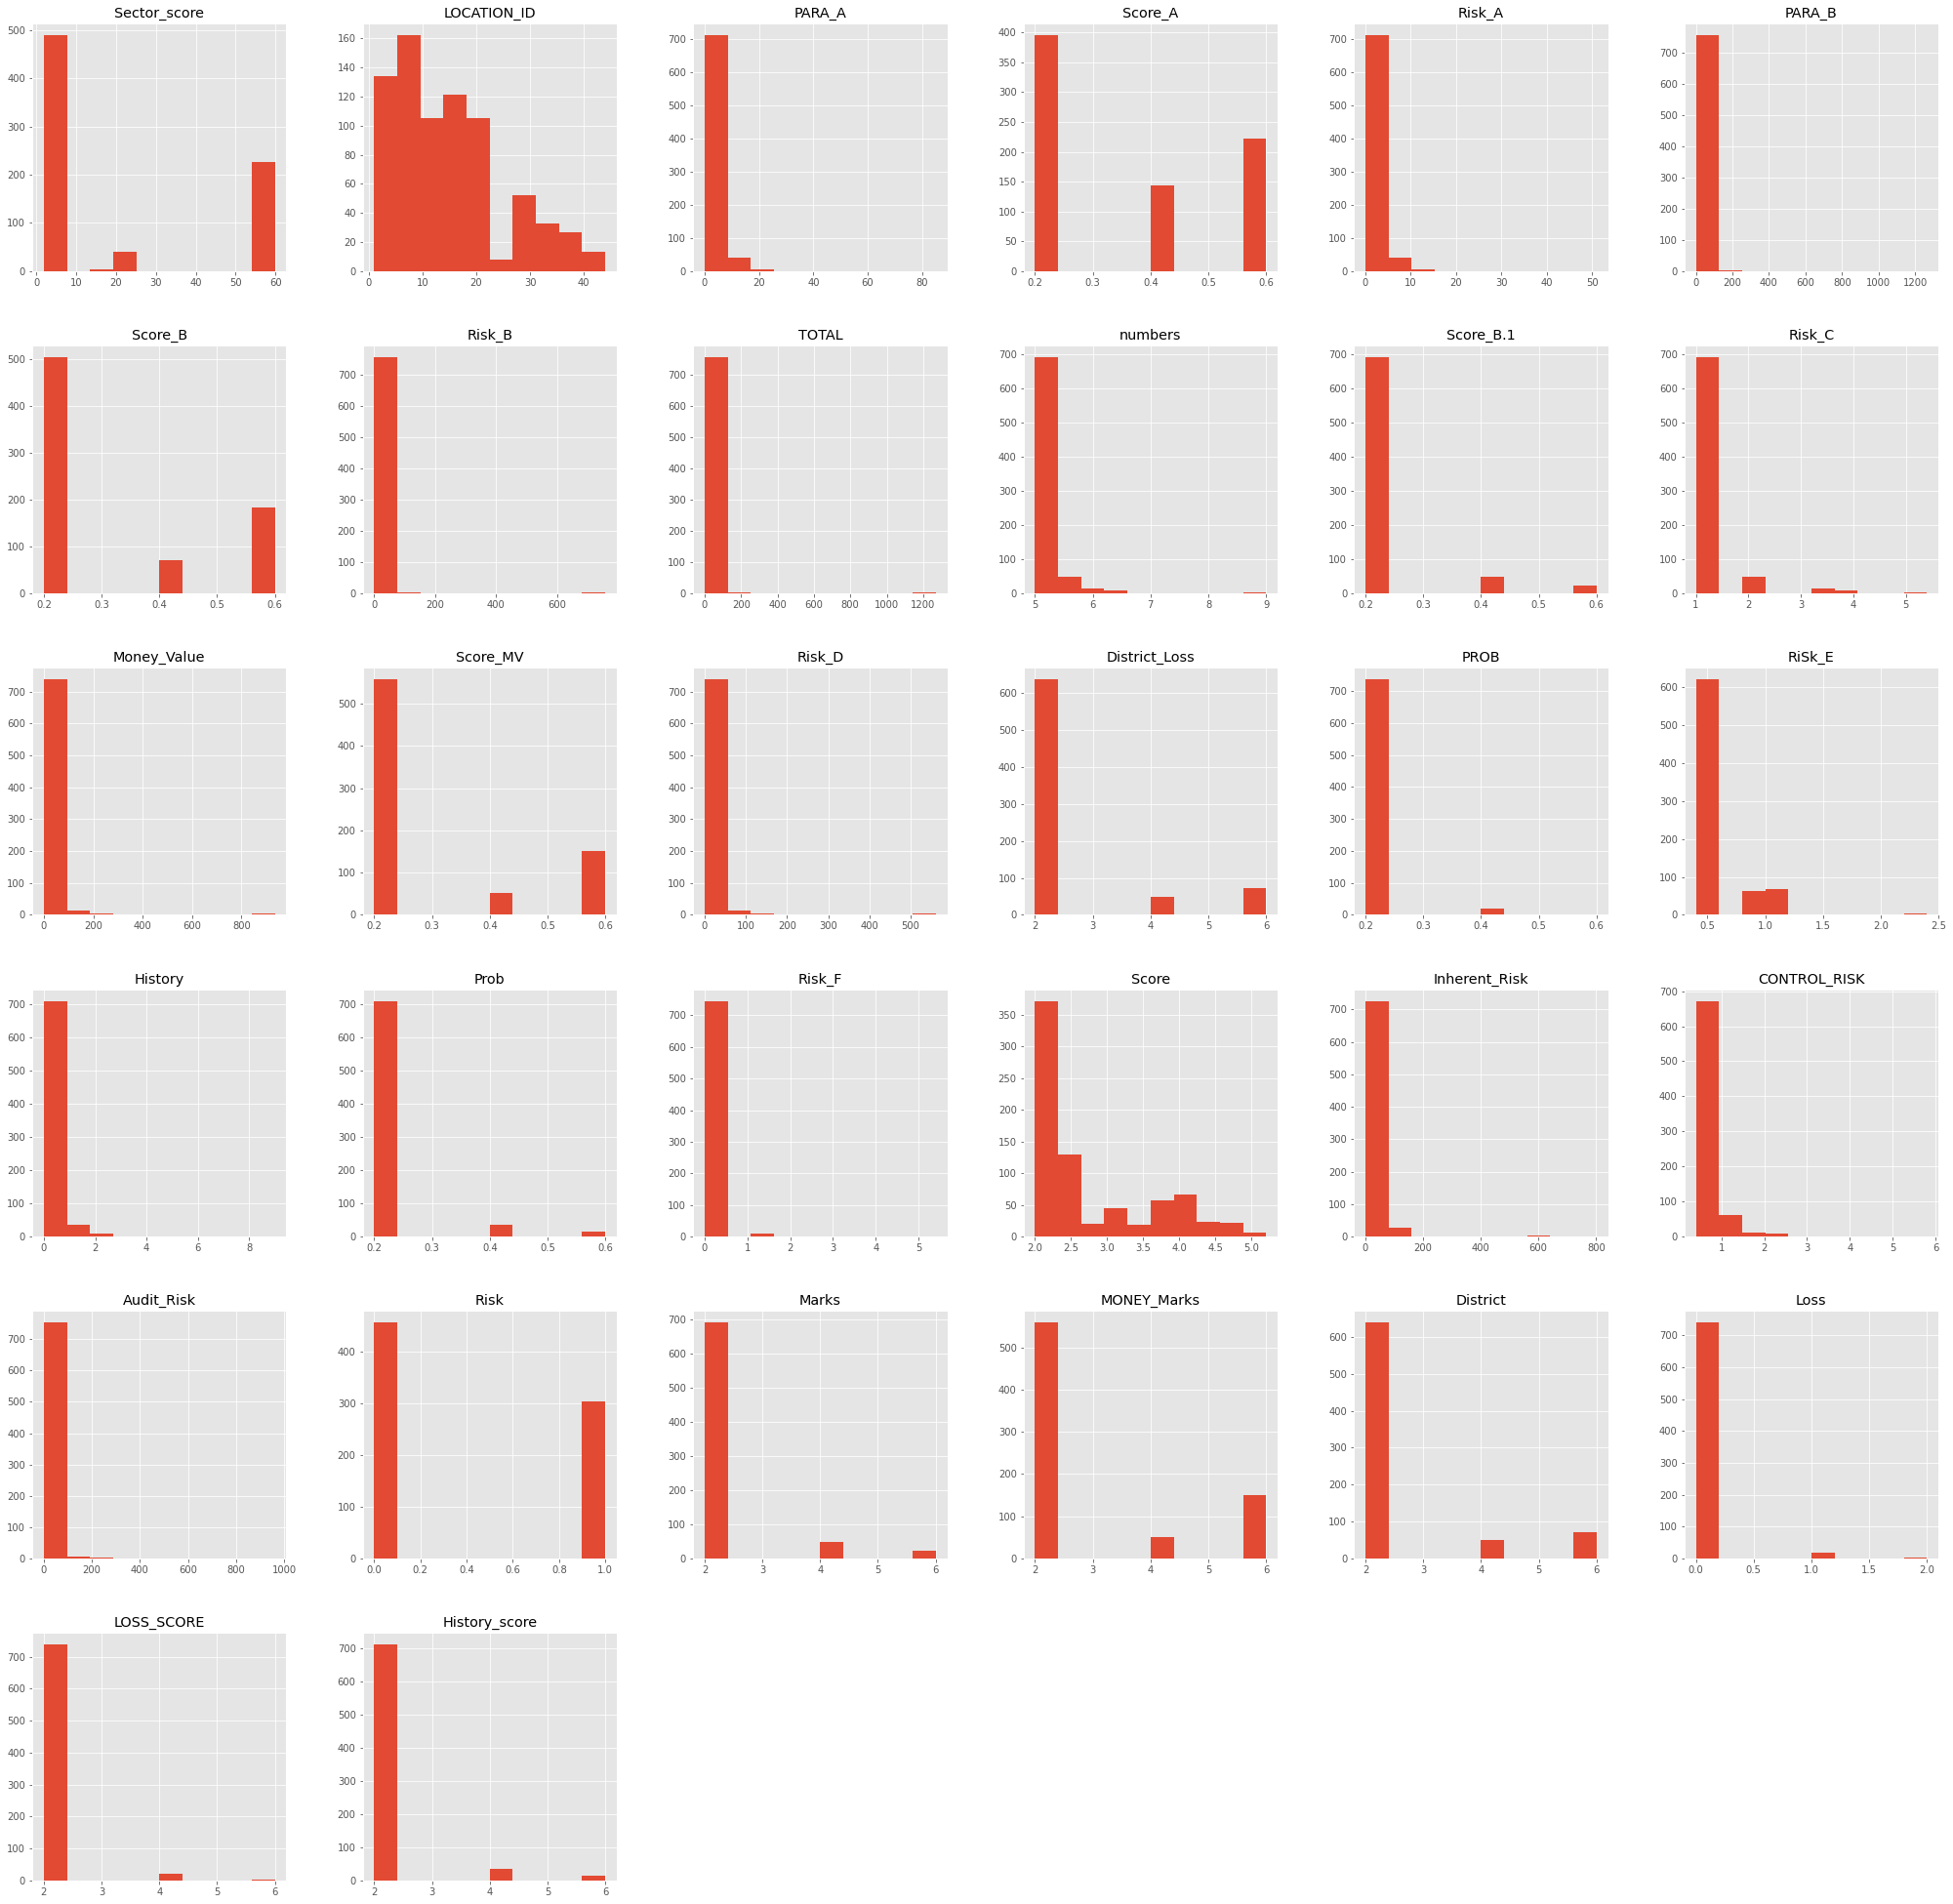

In [69]:
one_df.hist(figsize= (35, 35));

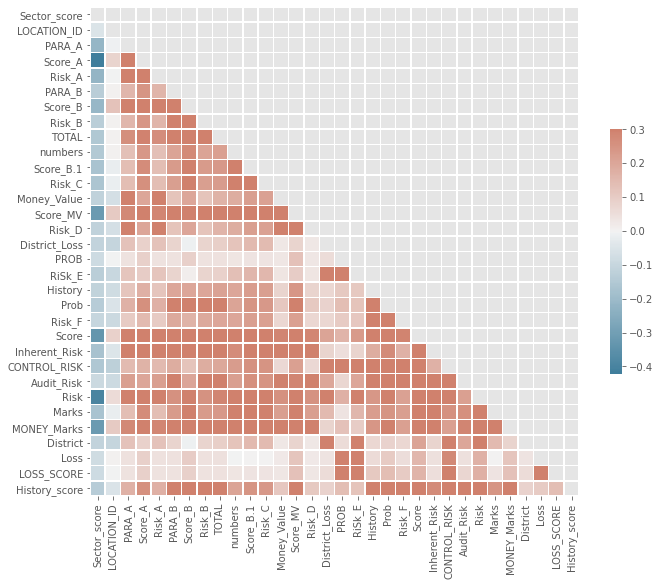

In [96]:
corr = one_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [97]:
corr.style.background_gradient(cmap=cmap).set_precision(2)

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,Score_B.1,Risk_C,Money_Value,Score_MV,Risk_D,District_Loss,PROB,RiSk_E,History,Prob,Risk_F,Score,Inherent_Risk,CONTROL_RISK,Audit_Risk,Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Sector_score,1.00,-0.05,-0.21,-0.42,-0.22,-0.13,-0.21,-0.13,-0.15,-0.15,-0.17,-0.16,-0.12,-0.32,-0.11,-0.11,-0.09,-0.13,-0.11,-0.14,-0.10,-0.33,-0.17,-0.16,-0.09,-0.39,-0.17,-0.32,-0.11,-0.08,-0.09,-0.14
LOCATION_ID,-0.05,1.00,-0.01,0.08,-0.00,0.01,0.13,0.01,0.01,0.01,-0.02,-0.02,-0.07,0.11,-0.07,-0.11,-0.00,-0.10,-0.08,-0.05,-0.09,0.09,-0.05,-0.12,-0.09,0.06,-0.02,0.11,-0.11,0.01,-0.00,-0.05
PARA_A,-0.21,-0.01,1.00,0.49,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.28,0.45,0.13,0.04,0.12,0.12,0.17,0.10,0.42,0.48,0.15,0.22,0.38,0.14,0.28,0.13,0.04,0.04,0.17
Score_A,-0.42,0.08,0.49,1.00,0.50,0.25,0.57,0.25,0.30,0.24,0.27,0.26,0.20,0.47,0.20,0.09,0.09,0.10,0.18,0.26,0.15,0.72,0.32,0.17,0.20,0.62,0.27,0.47,0.09,0.09,0.09,0.26
Risk_A,-0.22,-0.00,1.00,0.50,1.00,0.16,0.36,0.16,0.27,0.13,0.14,0.14,0.45,0.29,0.45,0.13,0.04,0.12,0.12,0.17,0.11,0.43,0.48,0.15,0.22,0.38,0.14,0.29,0.13,0.04,0.04,0.17
PARA_B,-0.13,0.01,0.16,0.25,0.16,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.20,0.40,0.65,0.19,0.89,0.26,0.23,0.31,0.08,0.04,0.04,0.32
Score_B,-0.21,0.13,0.36,0.57,0.36,0.35,1.00,0.35,0.38,0.28,0.31,0.30,0.20,0.56,0.20,-0.01,0.09,0.01,0.20,0.31,0.17,0.90,0.36,0.12,0.21,0.63,0.31,0.56,-0.01,0.10,0.09,0.31
Risk_B,-0.13,0.01,0.16,0.25,0.16,1.00,0.35,1.00,0.99,0.21,0.23,0.22,0.12,0.31,0.12,0.08,0.04,0.08,0.20,0.32,0.19,0.40,0.65,0.19,0.89,0.25,0.23,0.31,0.08,0.04,0.04,0.32
TOTAL,-0.15,0.01,0.27,0.30,0.27,0.99,0.38,0.99,1.00,0.22,0.24,0.23,0.17,0.34,0.17,0.09,0.05,0.09,0.21,0.33,0.20,0.43,0.69,0.20,0.89,0.29,0.24,0.34,0.09,0.05,0.05,0.33
numbers,-0.15,0.01,0.13,0.24,0.13,0.21,0.28,0.21,0.22,1.00,0.91,0.96,0.19,0.45,0.19,0.12,0.03,0.14,0.20,0.21,0.20,0.50,0.27,0.23,0.22,0.31,0.91,0.45,0.12,-0.00,0.03,0.21


In [119]:
def correlation(dataset, threshold):
    col_corr = []
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) >= threshold and i!=j:
                colname = corr_matrix.columns[i]
                col_corr.append(colname)
    return col_corr

In [124]:
corr_columns = correlation(one_df, 0.8)
corr_columns = list(dict.fromkeys(corr_columns))
corr_columns

['Risk_A',
 'Risk_B',
 'TOTAL',
 'Score_B.1',
 'Risk_C',
 'Risk_D',
 'RiSk_E',
 'Prob',
 'Risk_F',
 'Score',
 'Inherent_Risk',
 'Audit_Risk',
 'Marks',
 'MONEY_Marks',
 'District',
 'Loss',
 'LOSS_SCORE',
 'History_score']

In [125]:
two_df = one_df[corr_columns]

two_df

,Risk_A,Risk_B,TOTAL,Score_B.1,Risk_C,Risk_D,RiSk_E,Prob,Risk_F,Score,Inherent_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,2.508,0.500,6.68,0.2,1.0,0.676,0.4,0.2,0.0,2.4,8.574,1.7148,2.0,2.0,2.0,0.0,2.0,2.0
1,0.000,0.966,4.83,0.2,1.0,0.188,0.4,0.2,0.0,2.0,2.554,0.5108,2.0,2.0,2.0,0.0,2.0,2.0
2,0.102,0.046,0.74,0.2,1.0,0.000,0.4,0.2,0.0,2.0,1.548,0.3096,2.0,2.0,2.0,0.0,2.0,2.0
3,0.000,6.480,10.80,0.6,3.6,7.050,0.4,0.2,0.0,4.4,17.530,3.5060,6.0,6.0,2.0,0.0,2.0,2.0
4,0.000,0.016,0.08,0.2,1.0,0.000,0.4,0.2,0.0,2.0,1.416,0.2832,2.0,2.0,2.0,0.0,2.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
755,0.150,0.090,1.20,0.2,1.0,0.000,0.4,0.2,0.0,2.0,1.640,0.3280,2.0,2.0,2.0,0.0,2.0,2.0
756,0.094,0.074,0.84,0.2,1.0,0.000,0.4,0.2,0.0,2.0,1.568,0.3136,2.0,2.0,2.0,0.0,2.0,2.0
757,0.048,0.008,0.28,0.2,1.0,0.000,0.4,0.2,0.0,2.0,1.456,0.2912,2.0,2.0,2.0,0.0,2.0,2.0
758,0.040,0.000,0.20,0.2,1.0,0.000,0.4,0.2,0.0,2.0,1.440,0.2880,2.0,2.0,2.0,0.0,2.0,2.0


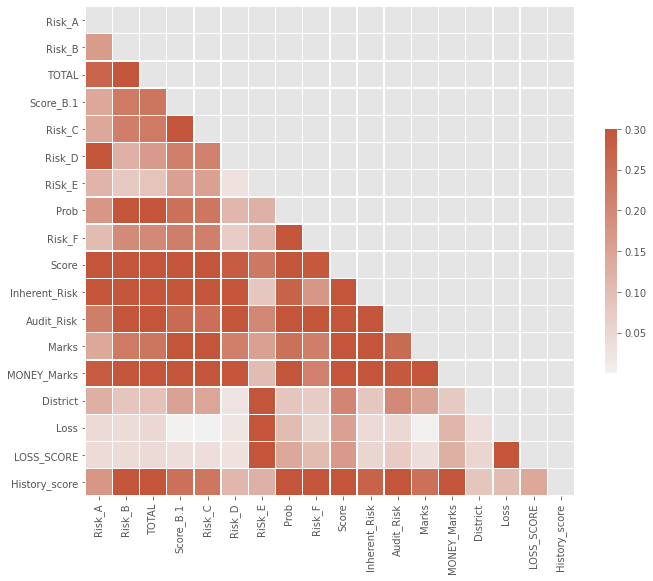

In [126]:
corr = two_df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [127]:
corr.style.background_gradient(cmap=cmap).set_precision(2)

,Risk_A,Risk_B,TOTAL,Score_B.1,Risk_C,Risk_D,RiSk_E,Prob,Risk_F,Score,Inherent_Risk,Audit_Risk,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
Risk_A,1.00,0.16,0.27,0.14,0.14,0.45,0.12,0.17,0.11,0.43,0.48,0.22,0.14,0.29,0.13,0.04,0.04,0.17
Risk_B,0.16,1.00,0.99,0.23,0.22,0.12,0.08,0.32,0.19,0.40,0.65,0.89,0.23,0.31,0.08,0.04,0.04,0.32
TOTAL,0.27,0.99,1.00,0.24,0.23,0.17,0.09,0.33,0.20,0.43,0.69,0.89,0.24,0.34,0.09,0.05,0.05,0.33
Score_B.1,0.14,0.23,0.24,1.00,0.99,0.22,0.16,0.25,0.22,0.57,0.31,0.26,1.00,0.51,0.15,0.00,0.04,0.25
Risk_C,0.14,0.22,0.23,0.99,1.00,0.21,0.15,0.24,0.22,0.55,0.30,0.25,0.99,0.49,0.15,0.00,0.04,0.24
Risk_D,0.45,0.12,0.17,0.22,0.21,1.00,0.03,0.11,0.07,0.29,0.83,0.33,0.22,0.39,0.03,0.02,0.03,0.11
RiSk_E,0.12,0.08,0.09,0.16,0.15,0.03,1.00,0.12,0.11,0.23,0.08,0.20,0.16,0.10,0.91,0.37,0.41,0.12
Prob,0.17,0.32,0.33,0.25,0.24,0.11,0.12,1.00,0.82,0.44,0.27,0.43,0.25,0.33,0.08,0.10,0.14,1.00
Risk_F,0.11,0.19,0.20,0.22,0.22,0.07,0.11,0.82,1.00,0.29,0.17,0.33,0.22,0.22,0.07,0.05,0.11,0.82
Score,0.43,0.40,0.43,0.57,0.55,0.29,0.23,0.44,0.29,1.00,0.46,0.33,0.57,0.76,0.21,0.16,0.17,0.44
